In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import seaborn as sns

In [32]:
data = pd.read_csv('breast-cancer.csv')
df = pd.DataFrame(data)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [36]:
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})
print(df['diagnosis'].head(15))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: diagnosis, dtype: int64


In [37]:
if 'id' in df.columns:
    df = df.drop(columns=['id'])

In [38]:
X = df[['radius_mean', 'texture_mean']]  # you can choose other features
y = df['diagnosis']

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
y_train.value_counts(normalize=True)

diagnosis
1    0.626374
0    0.373626
Name: proportion, dtype: float64

SVM

In [42]:
# 2. Train SVM with linear and RBF kernels
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

# Evaluate performance
print("Linear Kernel:\n", classification_report(y_test, linear_svm.predict(X_test)))
print("RBF Kernel:\n", classification_report(y_test, rbf_svm.predict(X_test)))

Linear Kernel:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.89      0.90      0.90        72

    accuracy                           0.87       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114

RBF Kernel:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.93      0.90      0.92        72

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



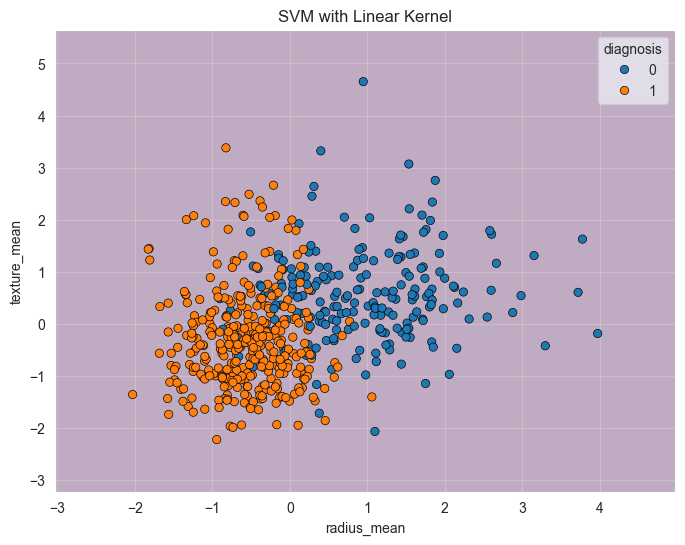

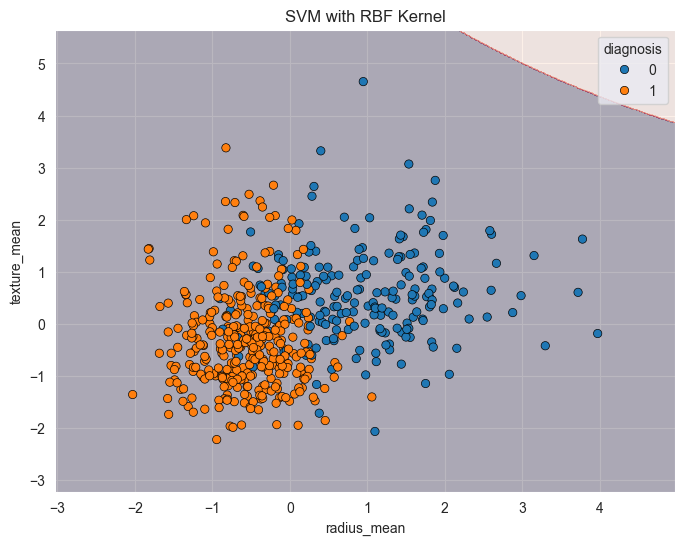

In [46]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Create prediction input and convert to DataFrame with column names
    mesh_input = np.c_[xx.ravel(), yy.ravel()]
    mesh_df = pd.DataFrame(mesh_input, columns=['radius_mean', 'texture_mean'])  # match your feature names

    Z = model.predict(mesh_df)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
    plt.title(title)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.show()


plot_decision_boundary(linear_svm, X_scaled, y, "SVM with Linear Kernel")
plot_decision_boundary(rbf_svm, X_scaled, y, "SVM with RBF Kernel")

In [49]:
# 4. Hyperparameter tuning for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.9032967032967033


In [50]:
# 5. Cross-validation performance
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.8245614  0.84210526 0.89473684 0.92982456 0.91150442]
Mean CV accuracy: 0.8805464989908399
